In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [36]:
dataset_ts = pd.read_csv("/content/drive/MyDrive/AusGas.csv")
dataset_ts.head()

Month  GasProd
0  Jan-1956     1709
1  Feb-1956     1646
2  Mar-1956     1794
3  Apr-1956     1878
4  May-1956     2173

In [39]:
dataset_ts.shape

(476, 2)

In [40]:
dataset_train = dataset_ts.iloc[:450,:]
dataset_train.shape

(450, 2)

In [43]:
training_set = dataset_train.iloc[:,1].values
training_set[:5]
#df_set.shape[:5]

array([1709, 1646, 1794, 1878, 2173])

In [45]:
training_set = training_set.reshape(-1, 1)


In [46]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled[:5]

array([[0.00103697],
       [0.        ],
       [0.00243605],
       [0.00381868],
       [0.00867433]])

## Creating a data structure with timesteps and output

In [47]:
timesteps = 10
trn_size = dataset_train.shape[0]
trn_size

450

In [48]:

X_train = []
y_train = []

for i in range(timesteps, trn_size):
  X_train.append(training_set_scaled[i - timesteps:i, 0])
  y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [49]:
y_train[:5]

array([0.0052013 , 0.00294631, 0.00172828, 0.00069131, 0.00450999])

In [22]:
X_train[:5]

array([[0.00103697, 0.        , 0.00243605, 0.00381868, 0.00867433,
        0.01111038, 0.01352997, 0.01267406, 0.00885538, 0.00781842],
       [0.        , 0.00243605, 0.00381868, 0.00867433, 0.01111038,
        0.01352997, 0.01267406, 0.00885538, 0.00781842, 0.0052013 ],
       [0.00243605, 0.00381868, 0.00867433, 0.01111038, 0.01352997,
        0.01267406, 0.00885538, 0.00781842, 0.0052013 , 0.00294631],
       [0.00381868, 0.00867433, 0.01111038, 0.01352997, 0.01267406,
        0.00885538, 0.00781842, 0.0052013 , 0.00294631, 0.00172828],
       [0.00867433, 0.01111038, 0.01352997, 0.01267406, 0.00885538,
        0.00781842, 0.0052013 , 0.00294631, 0.00172828, 0.00069131]])

In [27]:
# Reshaping

X_train = np.reshape(X_train,
                     (X_train.shape[0], X_train.shape[1], 1) )
X_train.shape

(440, 10, 1)

# Part 2 : Building RNN

In [30]:
import tensorflow as tf
from tensorflow import keras

## Initialising RNN

In [51]:
# (X_train.shape[1], X_train.shape[2])

In [31]:
tf.random.set_seed(seed = 2022)

model = keras.Sequential([
    tf.keras.layers.LSTM(units = 100, return_sequences = True,
                         input_shape = (X_train.shape[1], X_train.shape[2]) ),
    tf.keras.layers.LSTM(units = 70, return_sequences = True ),
    tf.keras.layers.LSTM(units = 50),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer = "adam",
              loss = "mean_squared_error")

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 10, 70)            47880     
                                                                 
 lstm_2 (LSTM)               (None, 50)                24200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 112,931
Trainable params: 112,931
Non-trainable params: 0
_________________________________________________________________


## Fitting the RNN to the training Set

In [52]:
model.fit(X_train, y_train, epochs = 50, batch_size = 25)

Epoch 1/50
18/18 [==============================] - 6s 21ms/step - loss: 0.0495
Epoch 2/50
18/18 [==============================] - 0s 21ms/step - loss: 0.0110
Epoch 3/50
18/18 [==============================] - 0s 21ms/step - loss: 0.0089
Epoch 4/50
18/18 [==============================] - 0s 21ms/step - loss: 0.0074
Epoch 5/50
18/18 [==============================] - 0s 21ms/step - loss: 0.0073
Epoch 6/50
18/18 [==============================] - 0s 21ms/step - loss: 0.0072
Epoch 7/50
18/18 [==============================] - 0s 21ms/step - loss: 0.0073
Epoch 8/50
18/18 [==============================] - 0s 21ms/step - loss: 0.0075
Epoch 9/50
18/18 [==============================] - 0s 21ms/step - loss: 0.0072
Epoch 10/50
18/18 [==============================] - 0s 22ms/step - loss: 0.0077
Epoch 11/50
18/18 [==============================] - 0s 23ms/step - loss: 0.0087
Epoch 12/50
18/18 [==============================] - 0s 20ms/step - loss: 0.0080
Epoch 13/50
18/18 [==================

In [54]:
dataset_test = dataset_ts.iloc[450:, :]
dataset_test.shape

(26, 2)

In [55]:
test_set = dataset_test.iloc[:, 1].values
test_set.shape

(26,)

In [58]:
dataset_total = pd.concat((dataset_train["GasProd"], dataset_test["GasProd"]),
                           axis = 0)
dataset_total

0       1709
1       1646
2       1794
3       1878
4       2173
       ...  
471    49013
472    56624
473    61739
474    66600
475    60054
Name: GasProd, Length: 476, dtype: int64

In [73]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - timesteps:].values
inputs = inputs.reshape(-1, 1)

len(inputs)

36

In [74]:
inputs = sc.transform(inputs)
X_test = []

In [75]:
for i in range(timesteps, len(inputs)):
  X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape
print(X_test)

[[[0.89445962]
  [0.75180235]
  [0.66864733]
  [0.62481483]
  [0.58289166]
  [0.59777134]
  [0.48386937]
  [0.65947921]
  [0.80192251]
  [0.91073839]]

 [[0.75180235]
  [0.66864733]
  [0.62481483]
  [0.58289166]
  [0.59777134]
  [0.48386937]
  [0.65947921]
  [0.80192251]
  [0.91073839]
  [0.90794022]]

 [[0.66864733]
  [0.62481483]
  [0.58289166]
  [0.59777134]
  [0.48386937]
  [0.65947921]
  [0.80192251]
  [0.91073839]
  [0.90794022]
  [0.87217303]]

 [[0.62481483]
  [0.58289166]
  [0.59777134]
  [0.48386937]
  [0.65947921]
  [0.80192251]
  [0.91073839]
  [0.90794022]
  [0.87217303]
  [0.81839879]]

 [[0.58289166]
  [0.59777134]
  [0.48386937]
  [0.65947921]
  [0.80192251]
  [0.91073839]
  [0.90794022]
  [0.87217303]
  [0.81839879]
  [0.76418014]]

 [[0.59777134]
  [0.48386937]
  [0.65947921]
  [0.80192251]
  [0.91073839]
  [0.90794022]
  [0.87217303]
  [0.81839879]
  [0.76418014]
  [0.73419034]]

 [[0.48386937]
  [0.65947921]
  [0.80192251]
  [0.91073839]
  [0.90794022]
  [0.87217303

In [64]:
predicted_values = model.predict(X_test)
predicted_values

1/1 [==============================] - 2s 2s/step


array([[0.9448642 ],
       [0.9393854 ],
       [0.84788895],
       [0.7300566 ],
       [0.6365161 ],
       [0.59788865],
       [0.5923539 ],
       [0.62368196],
       [0.65269816],
       [0.7293409 ],
       [0.78864384],
       [0.87034726],
       [0.91909623],
       [0.9322104 ],
       [0.9092065 ],
       [0.82623047],
       [0.734792  ],
       [0.6868149 ],
       [0.61729074],
       [0.59133595],
       [0.6262625 ],
       [0.7192022 ],
       [0.8436632 ],
       [0.96191865],
       [1.0090406 ],
       [1.0018649 ]], dtype=float32)

In [65]:
predicted_values.shape

(26, 1)

In [66]:
predicted_values = sc.inverse_transform(predicted_values)
predicted_values

array([[59050.28 ],
       [58717.42 ],
       [53158.645],
       [45999.86 ],
       [40316.9  ],
       [37970.13 ],
       [37633.867],
       [39537.176],
       [41300.023],
       [45956.38 ],
       [49559.27 ],
       [54523.08 ],
       [57484.773],
       [58281.51 ],
       [56883.934],
       [51842.805],
       [46287.555],
       [43372.754],
       [39148.883],
       [37572.023],
       [39693.953],
       [45340.414],
       [52901.914],
       [60086.406],
       [62949.25 ],
       [62513.297]], dtype=float32)

## Visualizing the Result

In [70]:
import matplotlib.pyplot as plt

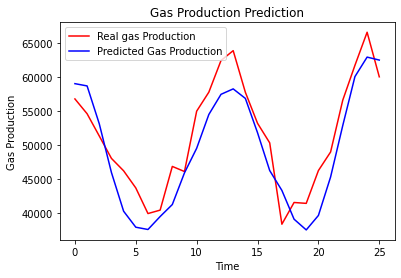

In [71]:
plt.plot(test_set, color ="red", label = "Real gas Production")
plt.plot(predicted_values, color = "blue", label = "Predicted Gas Production")

plt.title("Gas Production Prediction")
plt.xlabel("Time")
plt.ylabel("Gas Production")
plt.legend()
plt.show()